In [1]:
%%javascript
// to avoid scroll in windows
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
from IPython.display import Markdown as md
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
def day(n):
    return datetime(2020, 2, 3) + timedelta(n)

In [3]:
rundf = pd.read_csv('results/'+
        'SIsaR_0.9.5_noControl experiments 2 seeds-table.csv',
                    sep=',',skiprows=6)
case="# 1000 runs without containment measures"
md(case)

# 1000 runs without containment measures

In [4]:
rundf["totalInfected"]=rundf["cumulativeRedCount"]+rundf["cumulativeVioletCount"]
rundf["totalInfected&Deceased"]=rundf["totalInfected"]+rundf["cumulativeDeadCount"]
rundf["totalInfected&Deceased"]=rundf["totalInfected"]+rundf["cumulativeDeadCount"]

In [5]:
rundf.columns

Index(['[run number]', 'run#', '[step]', 'seed0', 'seed', 'cp1cRed',
       'cp1cRedNH', 'cp1cViolet', 'cp1cVioletNH', 'cp1cDead', 'cp2cRed',
       'cp2cRedNH', 'cp2cViolet', 'cp2cVioletNH', 'cp2cDead', 'cp3cRed',
       'cp3cRedNH', 'cp3cViolet', 'cp3cVioletNH', 'cp3cDead', 'cp4cRed',
       'cp4cRedNH', 'cp4cViolet', 'cp4cVioletNH', 'cp4cDead',
       'cumulativeRedCount', 'cumulativeVioletCount', 'cumulativeDeadCount',
       'ticks', 'TinfSch', 'SinfSch', 'TinfNotSch', 'SinfNotSch',
       'totalInfected', 'totalInfected&Deceased'],
      dtype='object')

In [6]:
rundf.replace(-1, np.nan, inplace=True)

In [7]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [8]:
rundf[['cp1cRedNH','cumulativeRedCount','totalInfected&Deceased','ticks']].describe()

,cp1cRedNH,cumulativeRedCount,totalInfected&Deceased,ticks
count,996.00,1000.00,1000.00,1000.00
mean,3.86,946.61,2469.83,364.92
std,7.38,111.50,290.80,61.71
min,0.00,0.00,2.00,26.00
25%,0.00,941.00,2454.00,331.00
50%,0.00,959.00,2501.00,362.00
75%,3.00,976.00,2547.00,397.00
max,47.00,1042.00,2693.00,599.00


In [9]:
tmp=rundf[['cp1cRedNH','cumulativeRedCount','totalInfected&Deceased','ticks']].describe()

In [10]:
print (tmp.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  cp1cRedNH &  cumulativeRedCount &  totalInfected\&Deceased &   ticks \\
\midrule
count &     996.00 &             1000.00 &                 1000.00 & 1000.00 \\
mean  &       3.86 &              946.61 &                 2469.83 &  364.92 \\
std   &       7.38 &              111.50 &                  290.80 &   61.71 \\
min   &       0.00 &                0.00 &                    2.00 &   26.00 \\
25\%   &       0.00 &              941.00 &                 2454.00 &  331.00 \\
50\%   &       0.00 &              959.00 &                 2501.00 &  362.00 \\
75\%   &       3.00 &              976.00 &                 2547.00 &  397.00 \\
max   &      47.00 &             1042.00 &                 2693.00 &  599.00 \\
\bottomrule
\end{tabular}



The output is included within:  
\begin{table}[htbp] or [H]

... output above ...

\label{a label}  
\caption{a caption}  
\end{table}


## 1 simulation time

array([[<AxesSubplot:title={'center':'ticks'}>]], dtype=object)

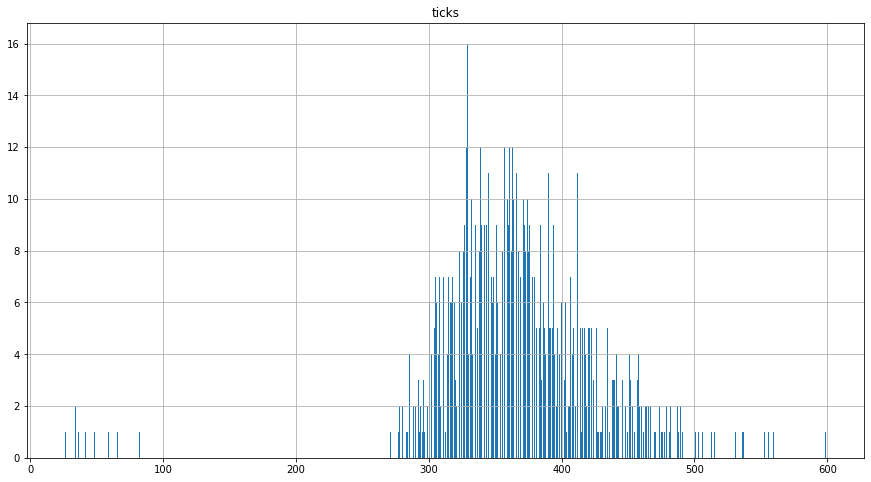

In [11]:
rundf.hist(column="ticks",bins=1000,figsize=(15,8))

## 2 symptomatic agent cumulative count

array([[<AxesSubplot:title={'center':'cumulativeRedCount'}>]],
      dtype=object)

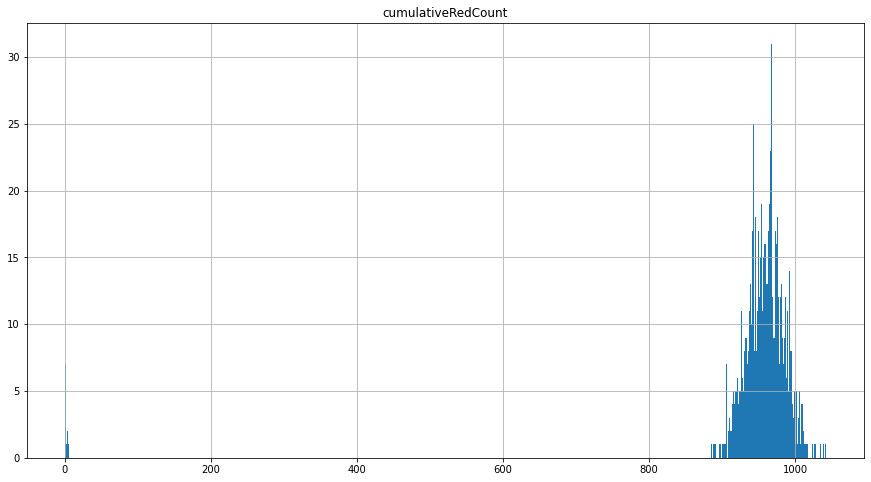

In [12]:
rundf.hist(column="cumulativeRedCount",bins=1000,figsize=(15,8))

## 3 symptomatic agent cumulative count vs. time 

<AxesSubplot:title={'center':'symptomatic agent cumulative count vs. time'}, xlabel='ticks', ylabel='cumulativeRedCount'>

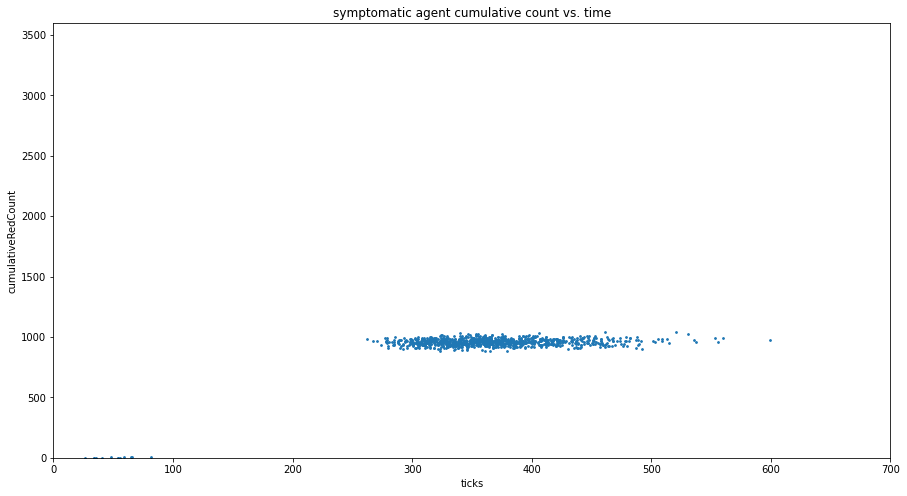

In [13]:
rundf.plot(x="ticks",y="cumulativeRedCount",s=3,kind='scatter',figsize=(15,8), 
           title="symptomatic agent cumulative count vs. time",
           ylim=(0,3600),xlim=(0,700))

## 4 symptomatic + asymptomatic agent cumulative count

array([[<AxesSubplot:title={'center':'totalInfected'}>]], dtype=object)

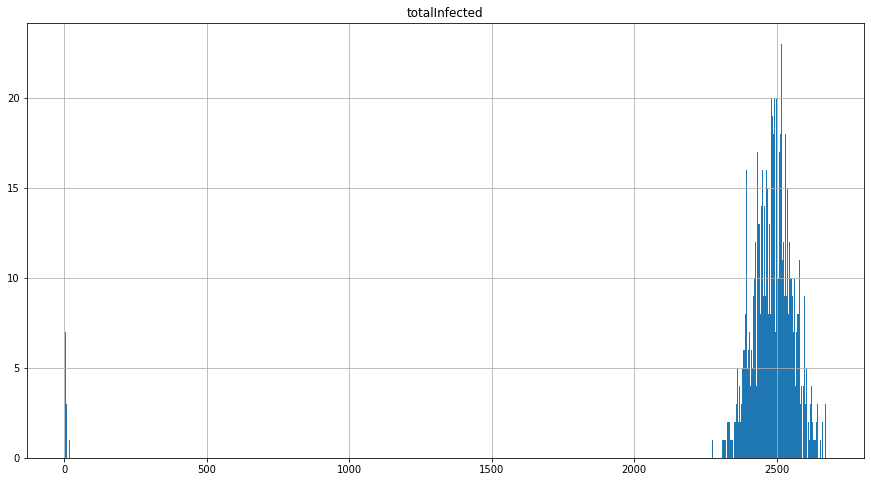

In [14]:
rundf.hist(column="totalInfected",bins=1000,figsize=(15,8))

## 5 total number of deceased

array([[<AxesSubplot:title={'center':'cumulativeDeadCount'}>]],
      dtype=object)

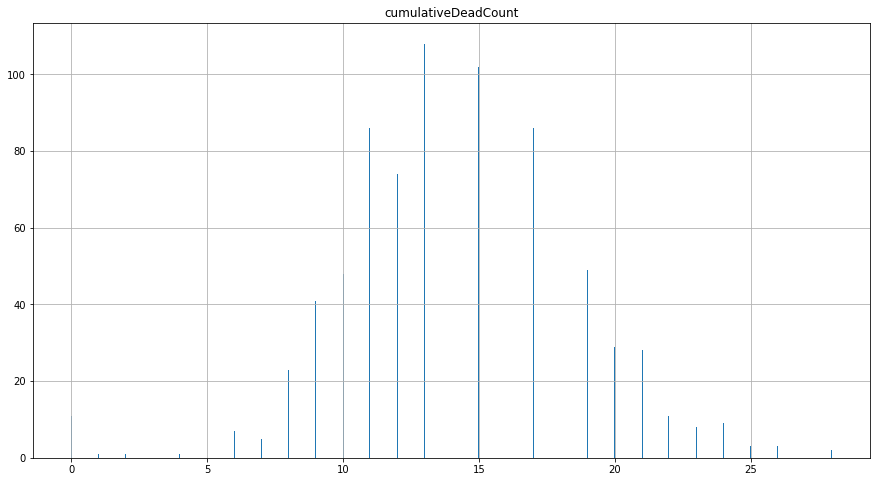

In [15]:
rundf.hist(column="cumulativeDeadCount",bins=1000,figsize=(15,8))

## 6 symptomatic + asymptomatic + deceased agent cumulative count

array([[<AxesSubplot:title={'center':'totalInfected&Deceased'}>]],
      dtype=object)

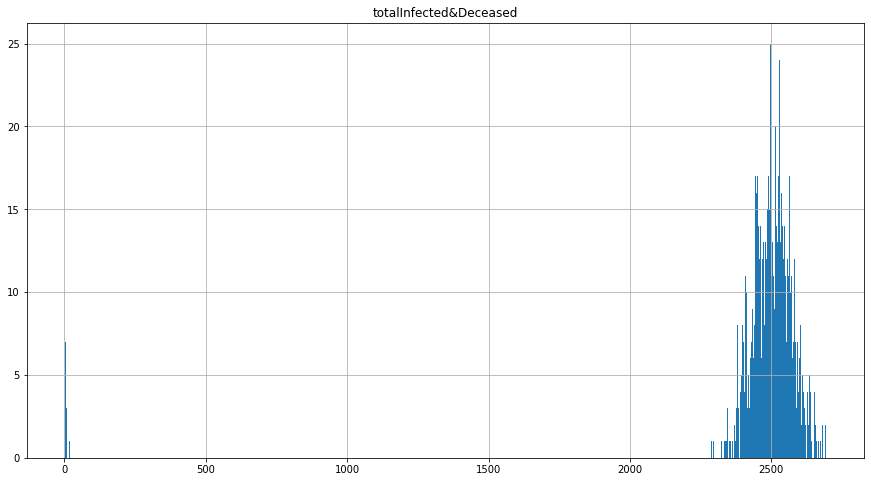

In [16]:
rundf.hist(column="totalInfected&Deceased",bins=1000,figsize=(15,8))

## 7 symptomatic + asymptomatic + deceased agent cumulative count vs. time

<AxesSubplot:title={'center':'simptomatic+asymptomatic+deceased vs. time'}, xlabel='ticks', ylabel='totalInfected&Deceased'>

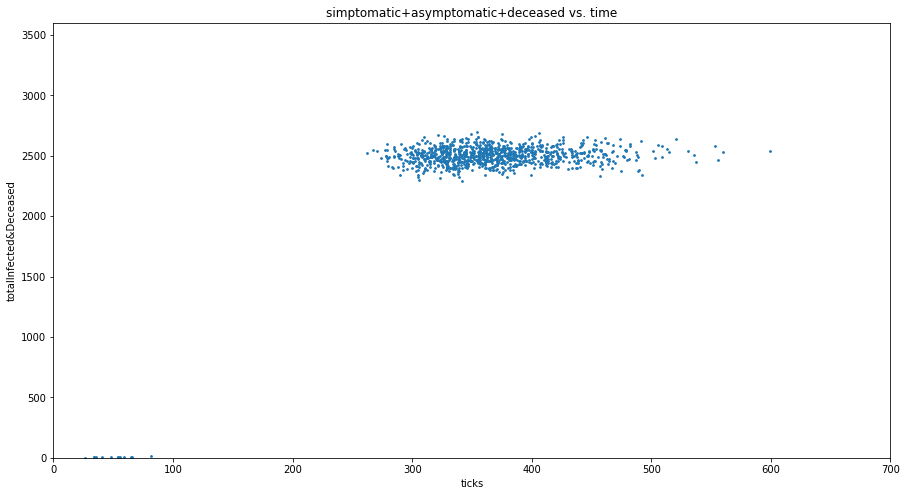

In [17]:
rundf.plot(x="ticks",y="totalInfected&Deceased",s=3,kind='scatter',figsize=(15,8), 
           title="simptomatic+asymptomatic+deceased vs. time",ylim=(0,3600),xlim=(0,700))

In [18]:
md("# --------------------------------------------------------\n"+\
    "# Time Function displaying heat-maps\n"+\
  "# --------------------------------------------------------")

# --------------------------------------------------------
# Time Function displaying heat-maps
# --------------------------------------------------------

In [29]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import LogNorm
import seaborn as sns; sns.set()

def timeFunction(day0,day1,title):
    
    rundfHere=rundf[rundf.ticks>=day0]
    rundfHere=rundfHere[rundfHere.ticks<=day1]
    
    display(md ("## Epidemics with duration between {} days ({}) and {} days ({})"\
                   .format(day0,day(day0).strftime("%Y-%m-%d"),\
                           day1,day(day1).strftime("%Y-%m-%d"))) )
    
    
    rundfHere.rename(columns={'cumulativeRedCount': 'symptomatic',
                              'ticks':"duration"},inplace=True)
    
    tmp=rundfHere[['symptomatic','totalInfected&Deceased','duration']].describe();
    display(tmp)
    display(print(tmp.to_latex()))
    
    if rundfHere.shape[0] == 0: return
    
    for nBins in [10,20,30,60]:
        display(md ("## Epidemics with duration between {} days ({}) and {} days ({}), with {} bins"\
                   .format(day0,day(day0).strftime("%Y-%m-%d"),\
                           day1,day(day1).strftime("%Y-%m-%d"),nBins)) )
            
        rundfHere['totalInfected&Deceased'].plot.hist(bins=nBins, color="r",
                                            title=title+"\ntotalInfected&Deceased");
        plt.show()
        rundfHere['duration'].plot.hist(bins=nBins, color="g",
                                            title=title+"\ntotalInfected&Deceased");
        plt.show()

        # preparing data for the heat-map
        hist = plt.hist2d(x=rundfHere['duration'], y=rundfHere['totalInfected&Deceased'], 
                          bins=nBins, range=[[0, 700], [0, 3600]])
        plt.close() #to avoid the output of hist2d
        
        zMax=np.amax(hist[0]) # max level z axis
        display(md ("With {} bins, the max value on z axis is {}, first row {}"\
                    .format(nBins,zMax,np.transpose(hist[0])[0])))
        
        if nBins == 60: plt.figure(figsize=(20,10))
        else:           plt.figure(figsize=(8.5,4.25))
        
        lognorm = LogNorm(vmin=1.0, vmax=np.amax(hist[0]))
        ax = sns.heatmap(
            np.flip(np.transpose(hist[0]),0), 
            #robust=True, 
            norm=lognorm,
            cmap='YlGnBu',
            annot=True, fmt='.0f', 
            xticklabels=np.round(hist[1][1:],0).astype(int),
            yticklabels=np.flip(hist[2][1:],0).astype(int),
            annot_kws={"size":8}
            )

        plt.xlabel("Days")
        plt.ylabel("Total symptomatic + asymptomatic + deceased")

        plt.title(title)

        plt.show()


## Epidemics with duration between 0 days (2020-02-03) and 1000 days (2022-10-30)

,symptomatic,totalInfected&Deceased,duration
count,1000.00,1000.00,1000.00
mean,946.61,2469.83,364.92
std,111.50,290.80,61.71
min,0.00,2.00,26.00
25%,941.00,2454.00,331.00
50%,959.00,2501.00,362.00
75%,976.00,2547.00,397.00
max,1042.00,2693.00,599.00


\begin{tabular}{lrrr}
\toprule
{} &  symptomatic &  totalInfected\&Deceased &  duration \\
\midrule
count &      1000.00 &                 1000.00 &   1000.00 \\
mean  &       946.61 &                 2469.83 &    364.92 \\
std   &       111.50 &                  290.80 &     61.71 \\
min   &         0.00 &                    2.00 &     26.00 \\
25\%   &       941.00 &                 2454.00 &    331.00 \\
50\%   &       959.00 &                 2501.00 &    362.00 \\
75\%   &       976.00 &                 2547.00 &    397.00 \\
max   &      1042.00 &                 2693.00 &    599.00 \\
\bottomrule
\end{tabular}



None

## Epidemics with duration between 0 days (2020-02-03) and 1000 days (2022-10-30), with 10 bins

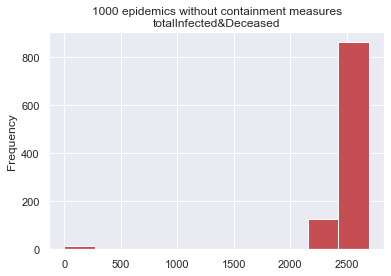

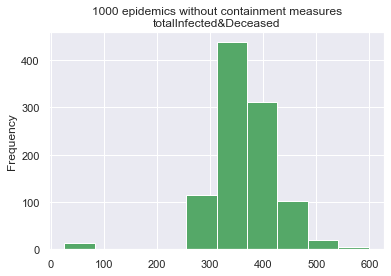

With 10 bins, the max value on z axis is 255.0, first row [12.  1.  0.  0.  0.  0.  0.  0.  0.  0.]

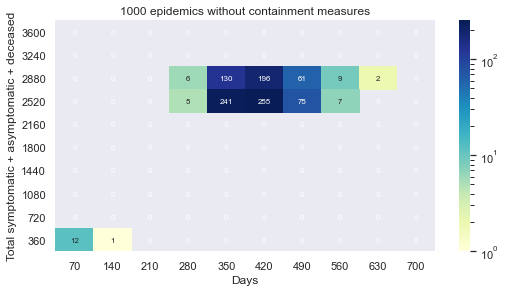

## Epidemics with duration between 0 days (2020-02-03) and 1000 days (2022-10-30), with 20 bins

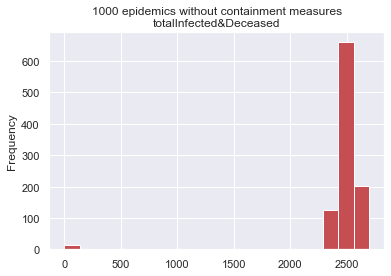

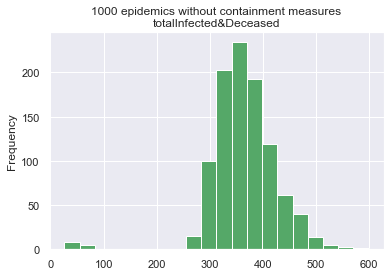

With 20 bins, the max value on z axis is 162.0, first row [3. 9. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

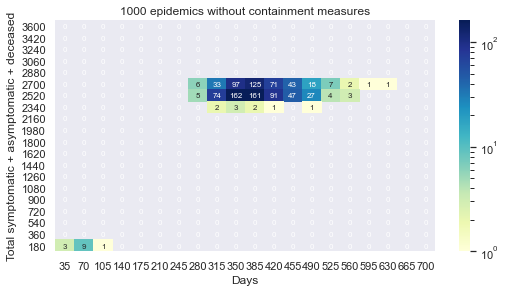

## Epidemics with duration between 0 days (2020-02-03) and 1000 days (2022-10-30), with 30 bins

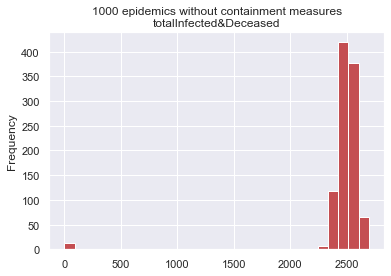

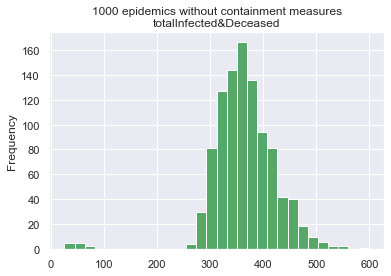

With 30 bins, the max value on z axis is 102.0, first row [0. 5. 7. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]

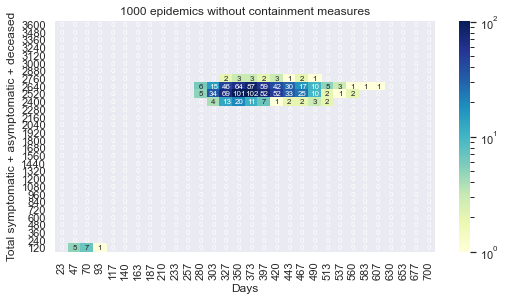

## Epidemics with duration between 0 days (2020-02-03) and 1000 days (2022-10-30), with 60 bins

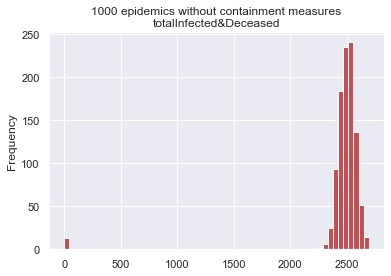

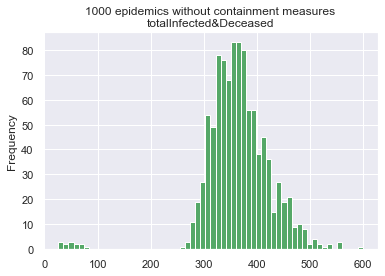

With 60 bins, the max value on z axis is 34.0, first row [0. 0. 3. 2. 4. 3. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

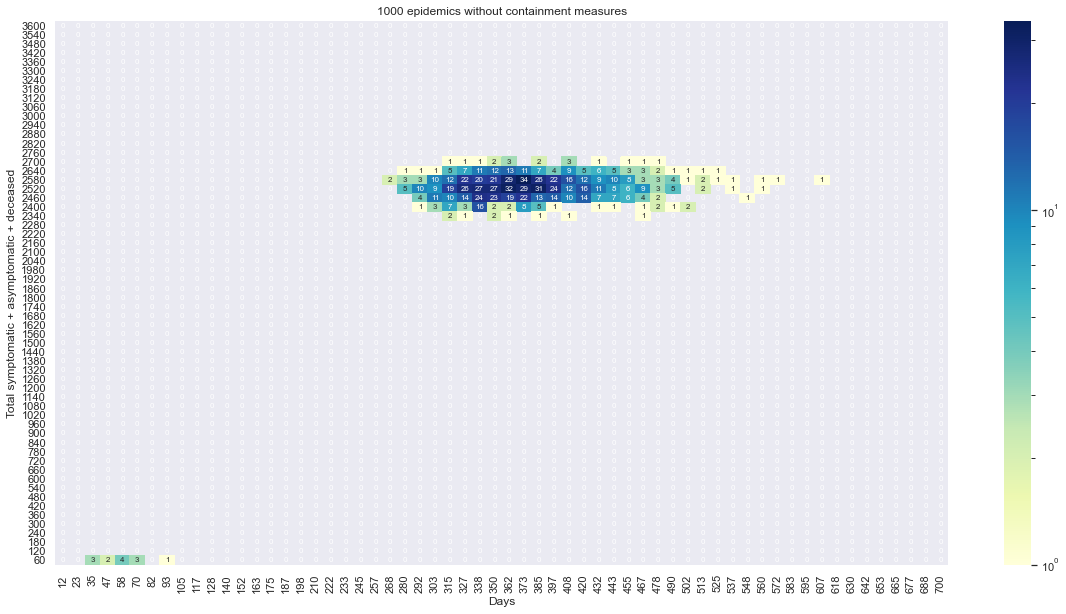

In [20]:
timeFunction(0,1000,'1000 epidemics without containment measures')

## Epidemics with duration between 0 days (2020-02-03) and 210 days (2020-08-31)

,symptomatic,totalInfected&Deceased,duration
count,13.00,13.00,13.00
mean,1.85,5.77,50.38
std,1.77,3.83,15.87
min,0.00,2.00,26.00
25%,0.00,3.00,36.00
50%,1.00,4.00,54.00
75%,3.00,7.00,59.00
max,5.00,16.00,82.00


\begin{tabular}{lrrr}
\toprule
{} &  symptomatic &  totalInfected\&Deceased &  duration \\
\midrule
count &        13.00 &                   13.00 &     13.00 \\
mean  &         1.85 &                    5.77 &     50.38 \\
std   &         1.77 &                    3.83 &     15.87 \\
min   &         0.00 &                    2.00 &     26.00 \\
25\%   &         0.00 &                    3.00 &     36.00 \\
50\%   &         1.00 &                    4.00 &     54.00 \\
75\%   &         3.00 &                    7.00 &     59.00 \\
max   &         5.00 &                   16.00 &     82.00 \\
\bottomrule
\end{tabular}



None

## Epidemics with duration between 0 days (2020-02-03) and 210 days (2020-08-31), with 10 bins

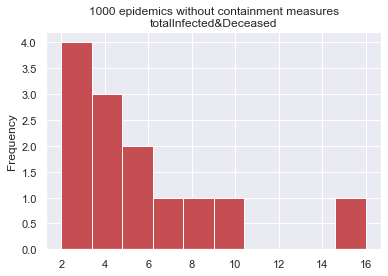

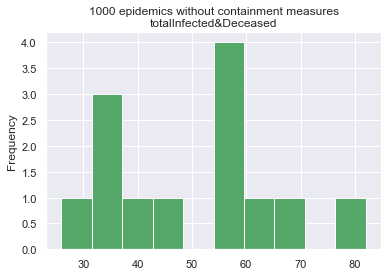

With 10 bins, the max value on z axis is 12.0, first row [12.  1.  0.  0.  0.  0.  0.  0.  0.  0.]

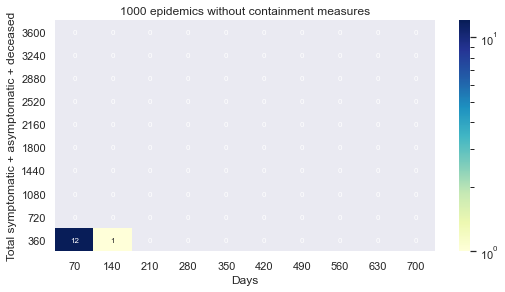

## Epidemics with duration between 0 days (2020-02-03) and 210 days (2020-08-31), with 20 bins

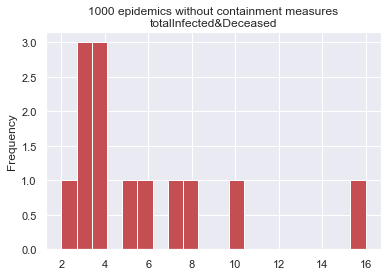

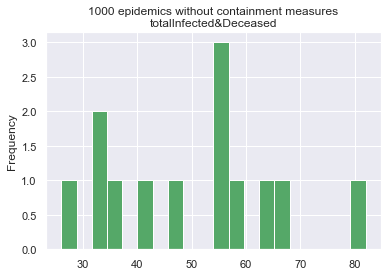

With 20 bins, the max value on z axis is 9.0, first row [3. 9. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

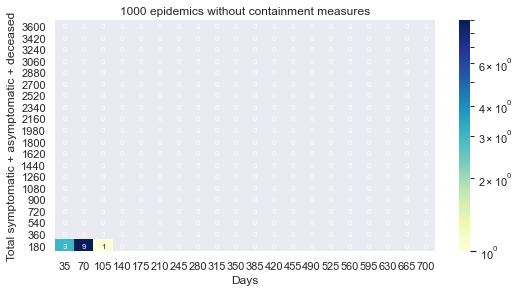

## Epidemics with duration between 0 days (2020-02-03) and 210 days (2020-08-31), with 30 bins

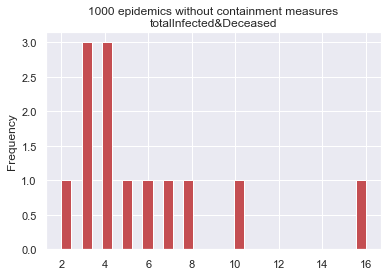

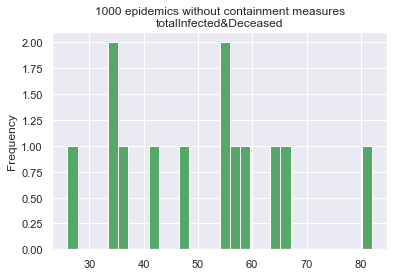

With 30 bins, the max value on z axis is 7.0, first row [0. 5. 7. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]

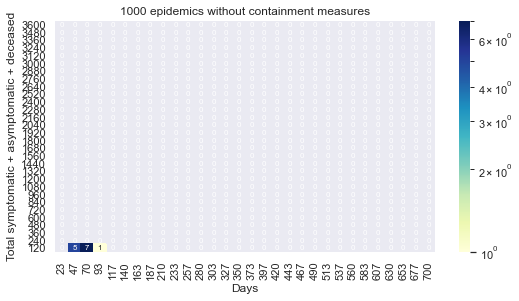

## Epidemics with duration between 0 days (2020-02-03) and 210 days (2020-08-31), with 60 bins

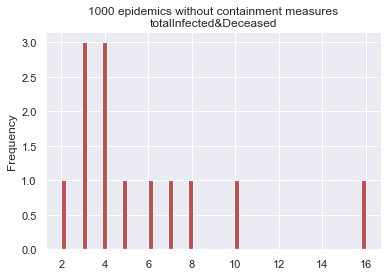

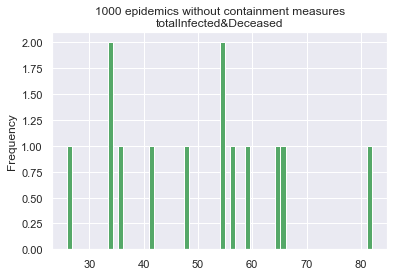

With 60 bins, the max value on z axis is 4.0, first row [0. 0. 3. 2. 4. 3. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

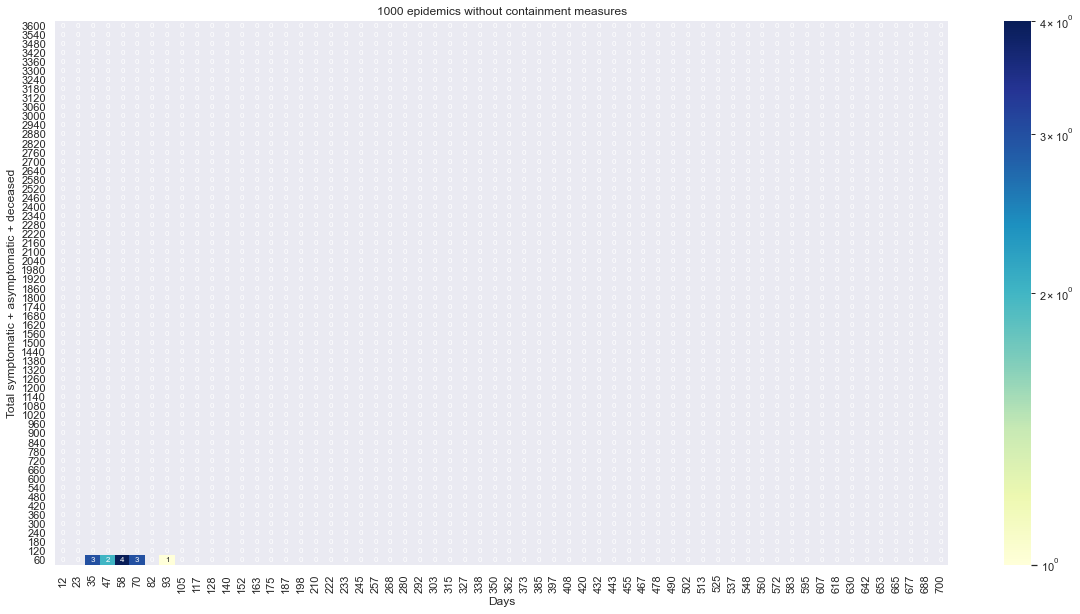

In [21]:
timeFunction(0,210,'1000 epidemics without containment measures')

## Epidemics with duration between 211 days (2020-09-01) and 422 days (2021-03-31)

,symptomatic,totalInfected&Deceased,duration
count,848.00,848.00,848.00
mean,958.42,2500.62,354.23
std,25.53,67.41,34.97
min,882.00,2288.00,262.00
25%,941.00,2454.00,328.00
50%,959.00,2500.00,356.00
75%,975.00,2547.00,380.00
max,1035.00,2693.00,422.00


\begin{tabular}{lrrr}
\toprule
{} &  symptomatic &  totalInfected\&Deceased &  duration \\
\midrule
count &       848.00 &                  848.00 &    848.00 \\
mean  &       958.42 &                 2500.62 &    354.23 \\
std   &        25.53 &                   67.41 &     34.97 \\
min   &       882.00 &                 2288.00 &    262.00 \\
25\%   &       941.00 &                 2454.00 &    328.00 \\
50\%   &       959.00 &                 2500.00 &    356.00 \\
75\%   &       975.00 &                 2547.00 &    380.00 \\
max   &      1035.00 &                 2693.00 &    422.00 \\
\bottomrule
\end{tabular}



None

## Epidemics with duration between 211 days (2020-09-01) and 422 days (2021-03-31), with 10 bins

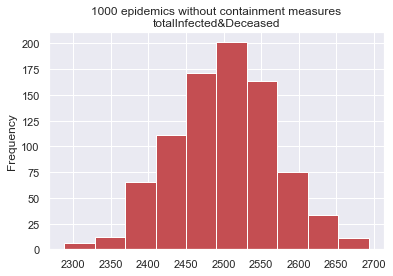

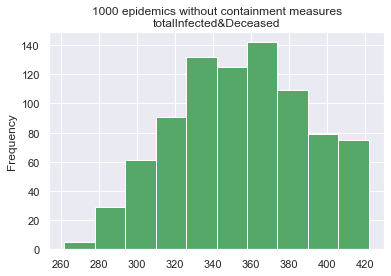

With 10 bins, the max value on z axis is 255.0, first row [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

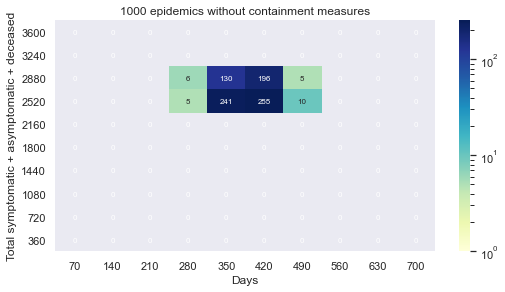

## Epidemics with duration between 211 days (2020-09-01) and 422 days (2021-03-31), with 20 bins

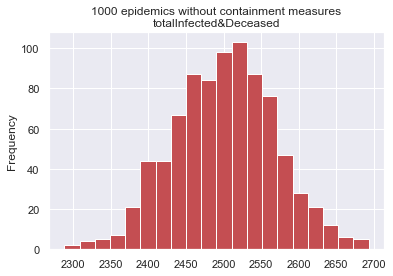

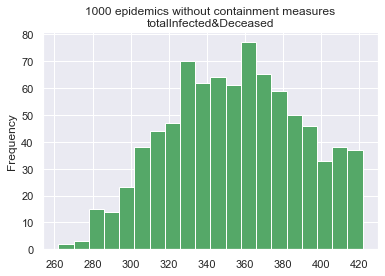

With 20 bins, the max value on z axis is 162.0, first row [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

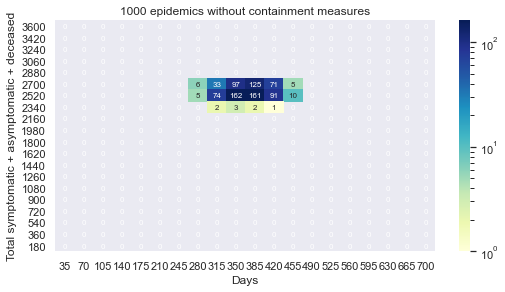

## Epidemics with duration between 211 days (2020-09-01) and 422 days (2021-03-31), with 30 bins

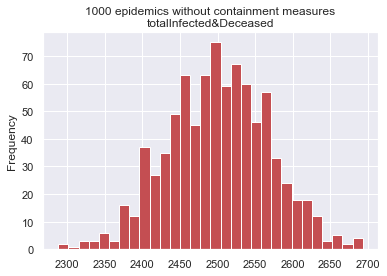

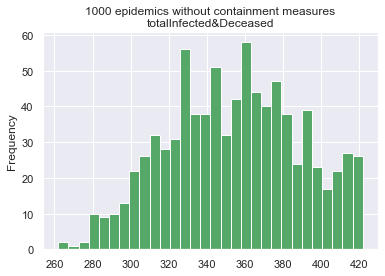

With 30 bins, the max value on z axis is 102.0, first row [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]

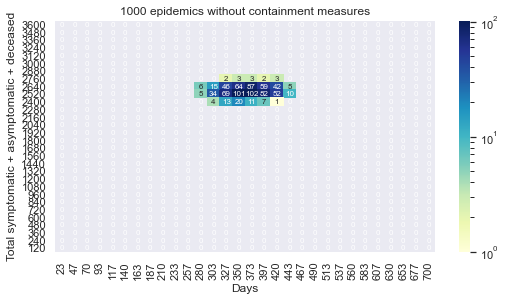

## Epidemics with duration between 211 days (2020-09-01) and 422 days (2021-03-31), with 60 bins

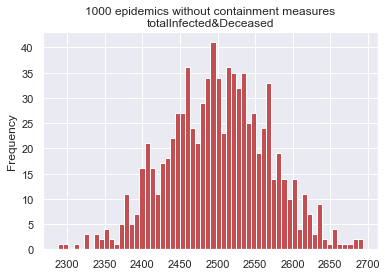

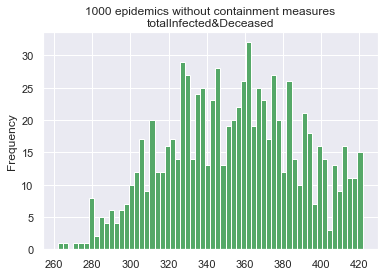

With 60 bins, the max value on z axis is 34.0, first row [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

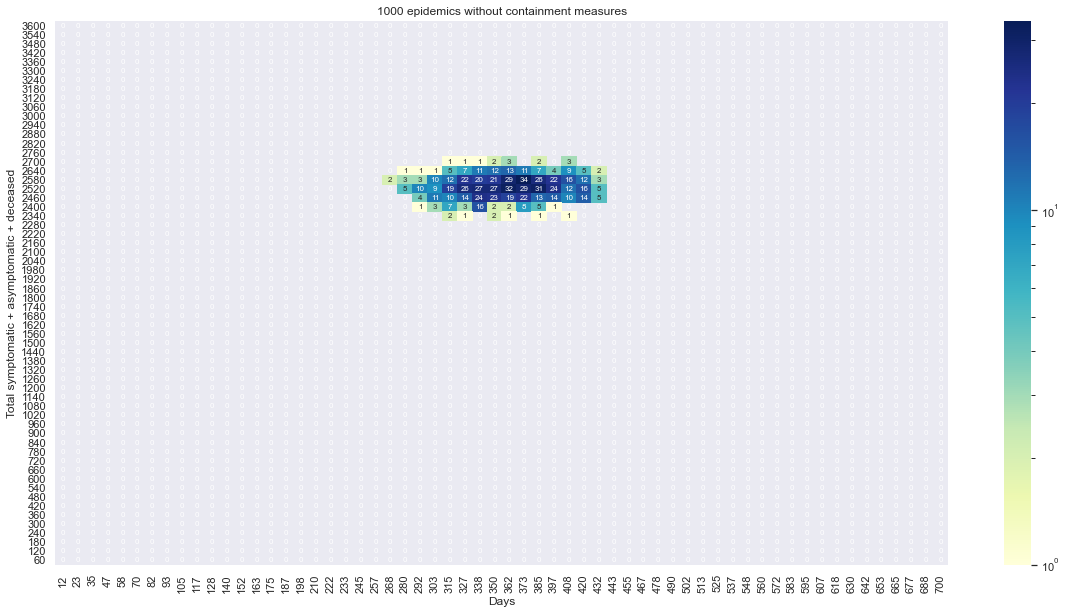

In [22]:
timeFunction(211,422,'1000 epidemics without containment measures')

## Epidemics with duration between 423 days (2021-04-01) and 1000 days (2022-10-30)

,symptomatic,totalInfected&Deceased,duration
count,139.00,139.00,139.00
mean,962.96,2512.49,459.57
std,27.97,68.31,31.51
min,897.00,2334.00,423.00
25%,944.00,2465.50,438.00
50%,964.00,2516.00,452.00
75%,982.50,2553.00,472.50
max,1042.00,2653.00,599.00


\begin{tabular}{lrrr}
\toprule
{} &  symptomatic &  totalInfected\&Deceased &  duration \\
\midrule
count &       139.00 &                  139.00 &    139.00 \\
mean  &       962.96 &                 2512.49 &    459.57 \\
std   &        27.97 &                   68.31 &     31.51 \\
min   &       897.00 &                 2334.00 &    423.00 \\
25\%   &       944.00 &                 2465.50 &    438.00 \\
50\%   &       964.00 &                 2516.00 &    452.00 \\
75\%   &       982.50 &                 2553.00 &    472.50 \\
max   &      1042.00 &                 2653.00 &    599.00 \\
\bottomrule
\end{tabular}



None

## Epidemics with duration between 423 days (2021-04-01) and 1000 days (2022-10-30), with 10 bins

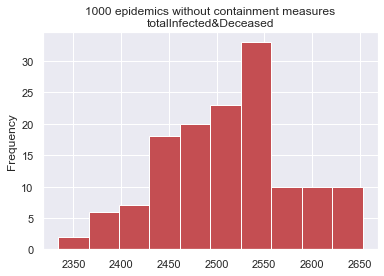

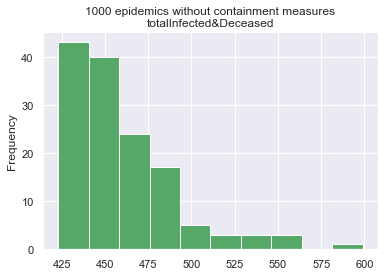

With 10 bins, the max value on z axis is 65.0, first row [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

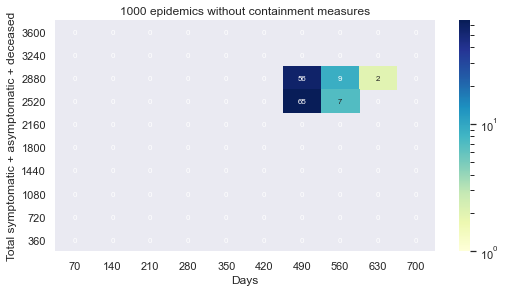

## Epidemics with duration between 423 days (2021-04-01) and 1000 days (2022-10-30), with 20 bins

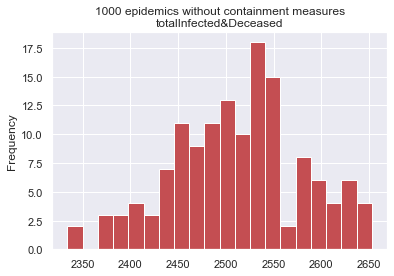

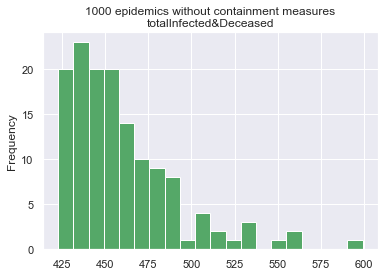

With 20 bins, the max value on z axis is 38.0, first row [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

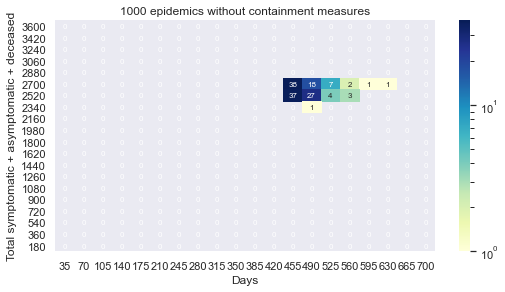

## Epidemics with duration between 423 days (2021-04-01) and 1000 days (2022-10-30), with 30 bins

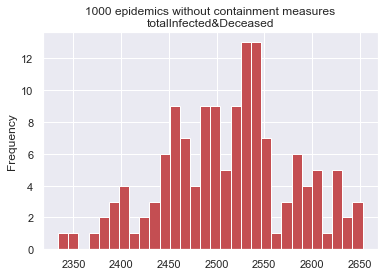

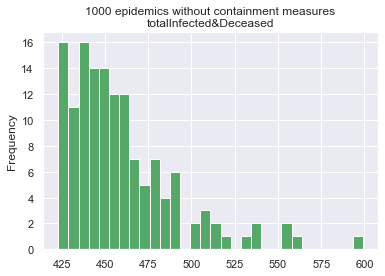

With 30 bins, the max value on z axis is 25.0, first row [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]

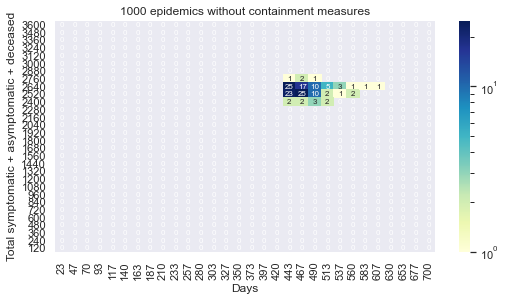

## Epidemics with duration between 423 days (2021-04-01) and 1000 days (2022-10-30), with 60 bins

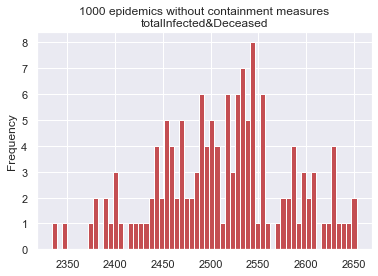

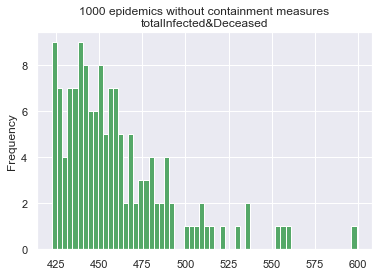

With 60 bins, the max value on z axis is 10.0, first row [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

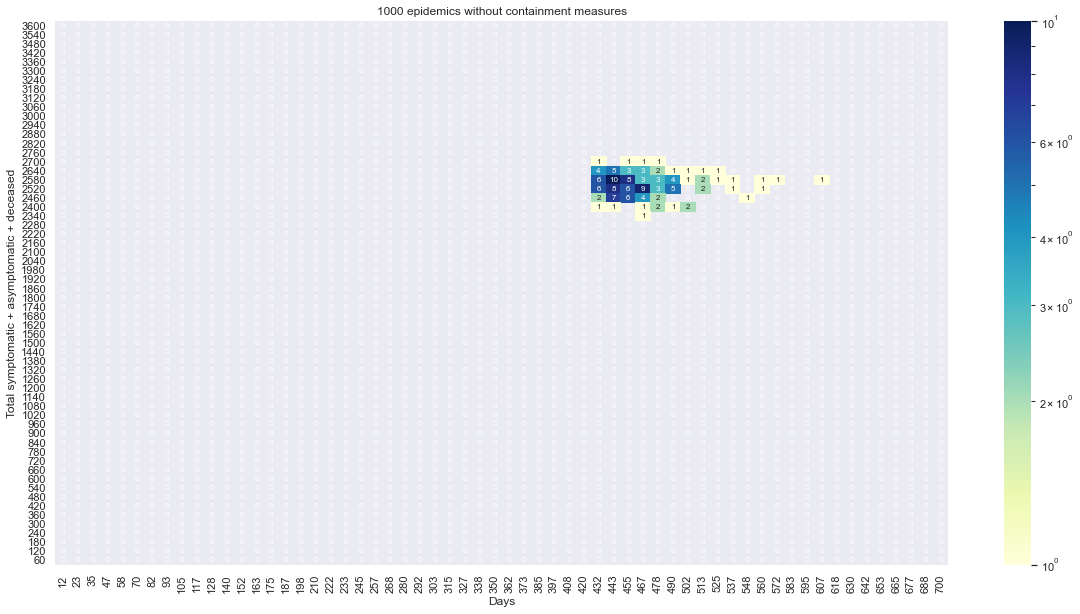

In [23]:
timeFunction(423,1000,'1000 epidemics without containment measures')

## Epidemics with duration between 0 days (2020-02-03) and 87 days (2020-04-30)

,symptomatic,totalInfected&Deceased,duration
count,13.00,13.00,13.00
mean,1.85,5.77,50.38
std,1.77,3.83,15.87
min,0.00,2.00,26.00
25%,0.00,3.00,36.00
50%,1.00,4.00,54.00
75%,3.00,7.00,59.00
max,5.00,16.00,82.00


\begin{tabular}{lrrr}
\toprule
{} &  symptomatic &  totalInfected\&Deceased &  duration \\
\midrule
count &        13.00 &                   13.00 &     13.00 \\
mean  &         1.85 &                    5.77 &     50.38 \\
std   &         1.77 &                    3.83 &     15.87 \\
min   &         0.00 &                    2.00 &     26.00 \\
25\%   &         0.00 &                    3.00 &     36.00 \\
50\%   &         1.00 &                    4.00 &     54.00 \\
75\%   &         3.00 &                    7.00 &     59.00 \\
max   &         5.00 &                   16.00 &     82.00 \\
\bottomrule
\end{tabular}



None

## Epidemics with duration between 0 days (2020-02-03) and 87 days (2020-04-30), with 10 bins

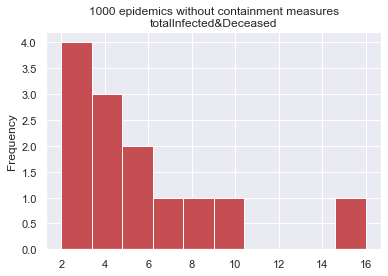

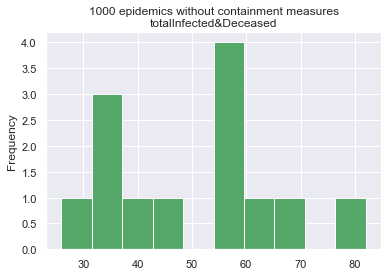

With 10 bins, the max value on z axis is 12.0, first row [12.  1.  0.  0.  0.  0.  0.  0.  0.  0.]

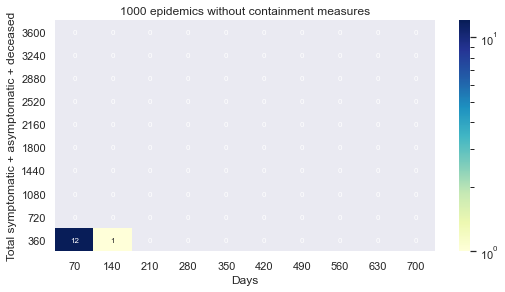

## Epidemics with duration between 0 days (2020-02-03) and 87 days (2020-04-30), with 20 bins

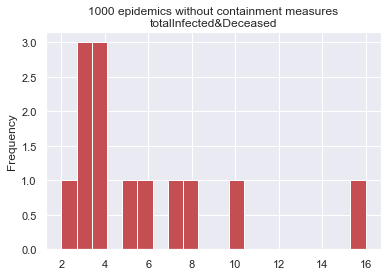

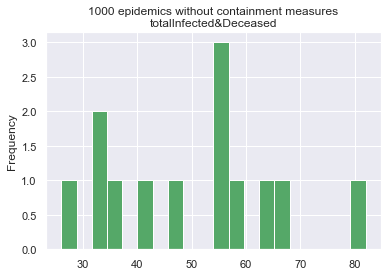

With 20 bins, the max value on z axis is 9.0, first row [3. 9. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

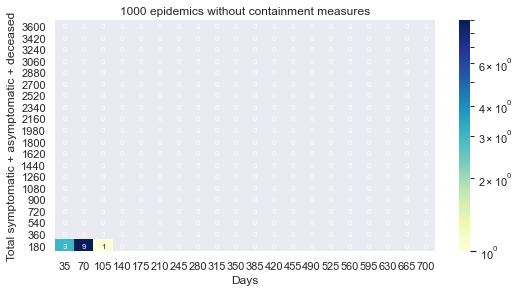

## Epidemics with duration between 0 days (2020-02-03) and 87 days (2020-04-30), with 30 bins

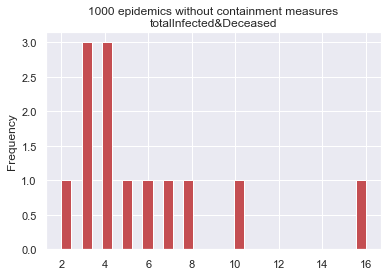

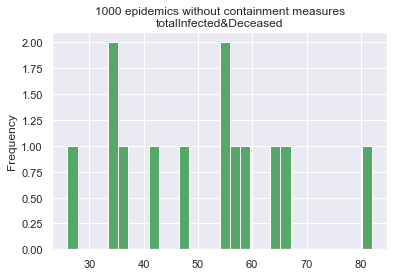

With 30 bins, the max value on z axis is 7.0, first row [0. 5. 7. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]

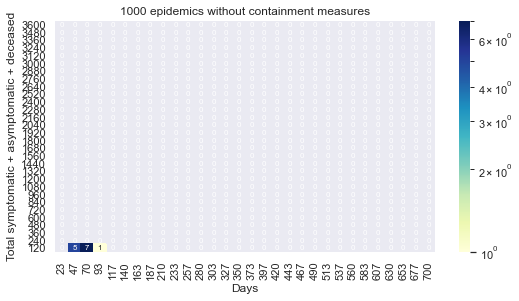

## Epidemics with duration between 0 days (2020-02-03) and 87 days (2020-04-30), with 60 bins

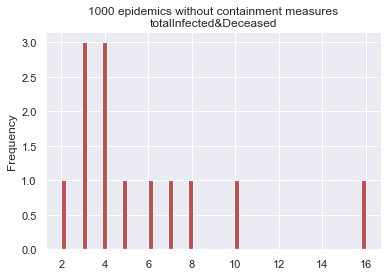

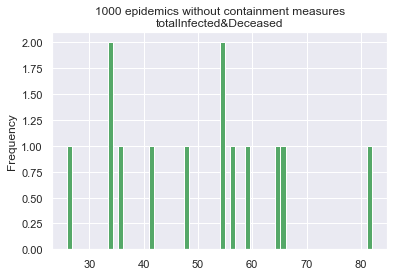

With 60 bins, the max value on z axis is 4.0, first row [0. 0. 3. 2. 4. 3. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

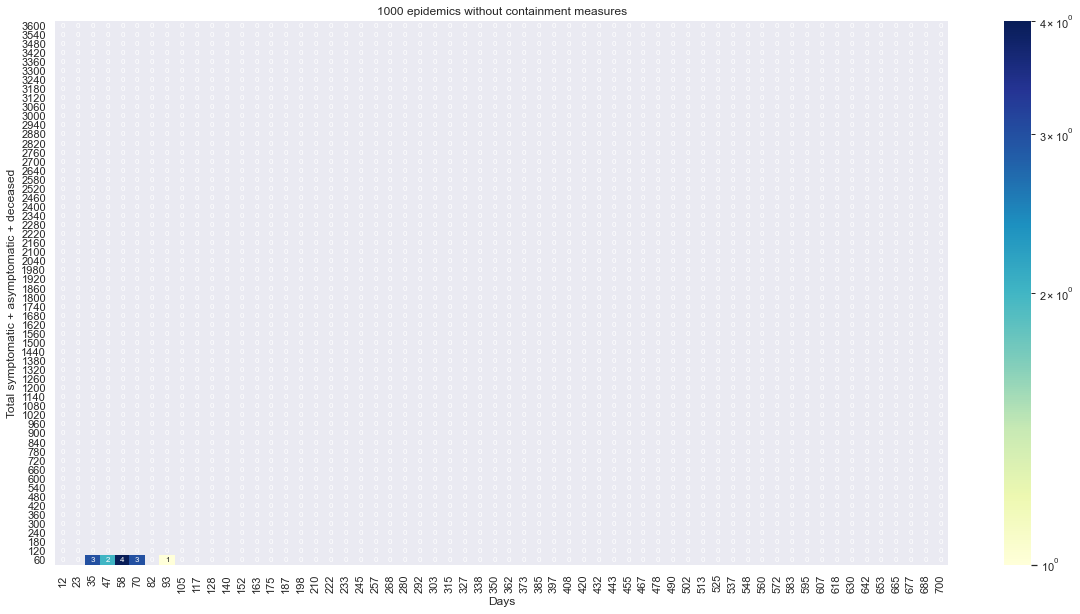

In [24]:
timeFunction(0,87,'1000 epidemics without containment measures')

In [30]:
timeFunction(88,148,'1000 epidemics without containment measures')

## Epidemics with duration between 88 days (2020-05-01) and 148 days (2020-06-30)

,symptomatic,totalInfected&Deceased,duration
count,0.00,0.00,0.00
mean,nan,nan,nan
std,nan,nan,nan
min,nan,nan,nan
25%,nan,nan,nan
50%,nan,nan,nan
75%,nan,nan,nan
max,nan,nan,nan


\begin{tabular}{lrrr}
\toprule
{} &  symptomatic &  totalInfected\&Deceased &  duration \\
\midrule
count &         0.00 &                    0.00 &      0.00 \\
mean  &          nan &                     nan &       nan \\
std   &          nan &                     nan &       nan \\
min   &          nan &                     nan &       nan \\
25\%   &          nan &                     nan &       nan \\
50\%   &          nan &                     nan &       nan \\
75\%   &          nan &                     nan &       nan \\
max   &          nan &                     nan &       nan \\
\bottomrule
\end{tabular}



None

## Epidemics with duration between 149 days (2020-07-01) and 1000 days (2022-10-30)

,symptomatic,totalInfected&Deceased,duration
count,987.00,987.00,987.00
mean,959.06,2502.29,369.07
std,25.92,67.63,50.33
min,882.00,2288.00,262.00
25%,941.00,2456.00,332.00
50%,959.00,2502.00,363.00
75%,976.00,2547.50,397.50
max,1042.00,2693.00,599.00


\begin{tabular}{lrrr}
\toprule
{} &  symptomatic &  totalInfected\&Deceased &  duration \\
\midrule
count &       987.00 &                  987.00 &    987.00 \\
mean  &       959.06 &                 2502.29 &    369.07 \\
std   &        25.92 &                   67.63 &     50.33 \\
min   &       882.00 &                 2288.00 &    262.00 \\
25\%   &       941.00 &                 2456.00 &    332.00 \\
50\%   &       959.00 &                 2502.00 &    363.00 \\
75\%   &       976.00 &                 2547.50 &    397.50 \\
max   &      1042.00 &                 2693.00 &    599.00 \\
\bottomrule
\end{tabular}



None

## Epidemics with duration between 149 days (2020-07-01) and 1000 days (2022-10-30), with 10 bins

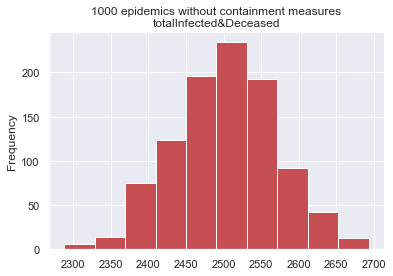

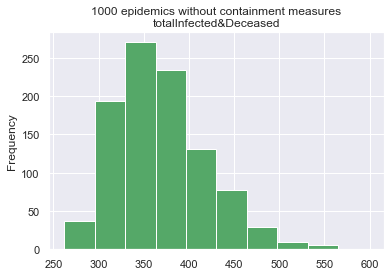

With 10 bins, the max value on z axis is 255.0, first row [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

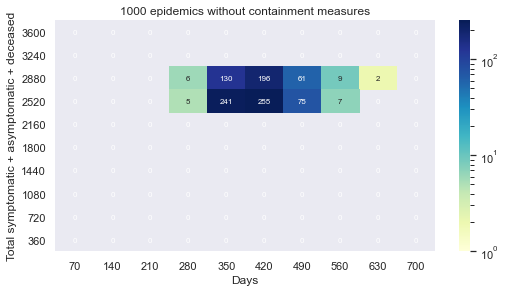

## Epidemics with duration between 149 days (2020-07-01) and 1000 days (2022-10-30), with 20 bins

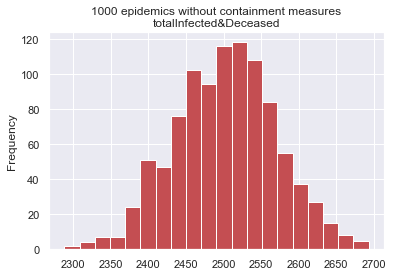

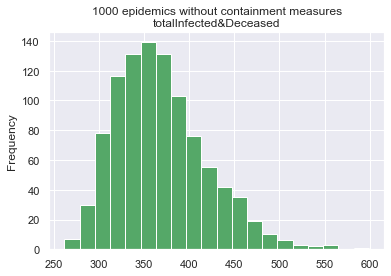

With 20 bins, the max value on z axis is 162.0, first row [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

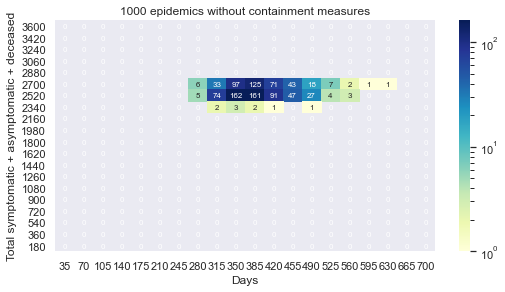

## Epidemics with duration between 149 days (2020-07-01) and 1000 days (2022-10-30), with 30 bins

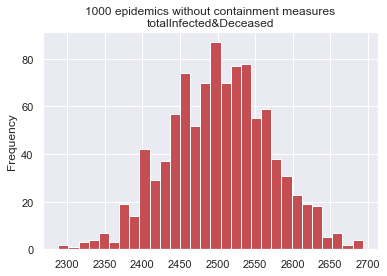

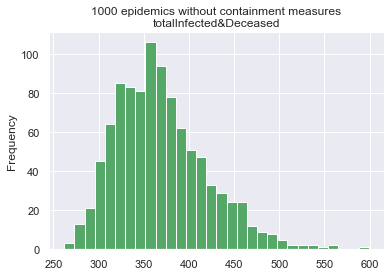

With 30 bins, the max value on z axis is 102.0, first row [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]

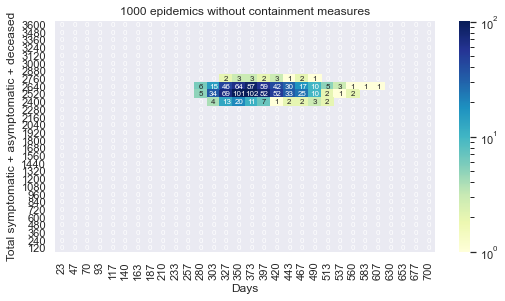

## Epidemics with duration between 149 days (2020-07-01) and 1000 days (2022-10-30), with 60 bins

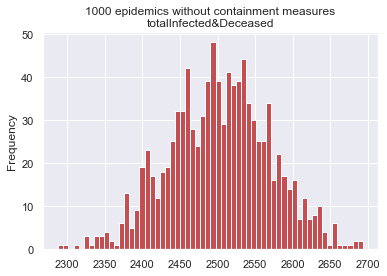

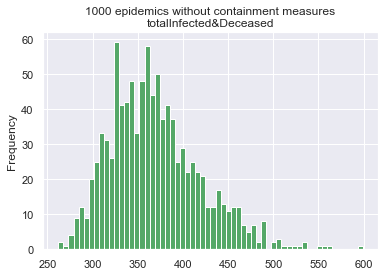

With 60 bins, the max value on z axis is 34.0, first row [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

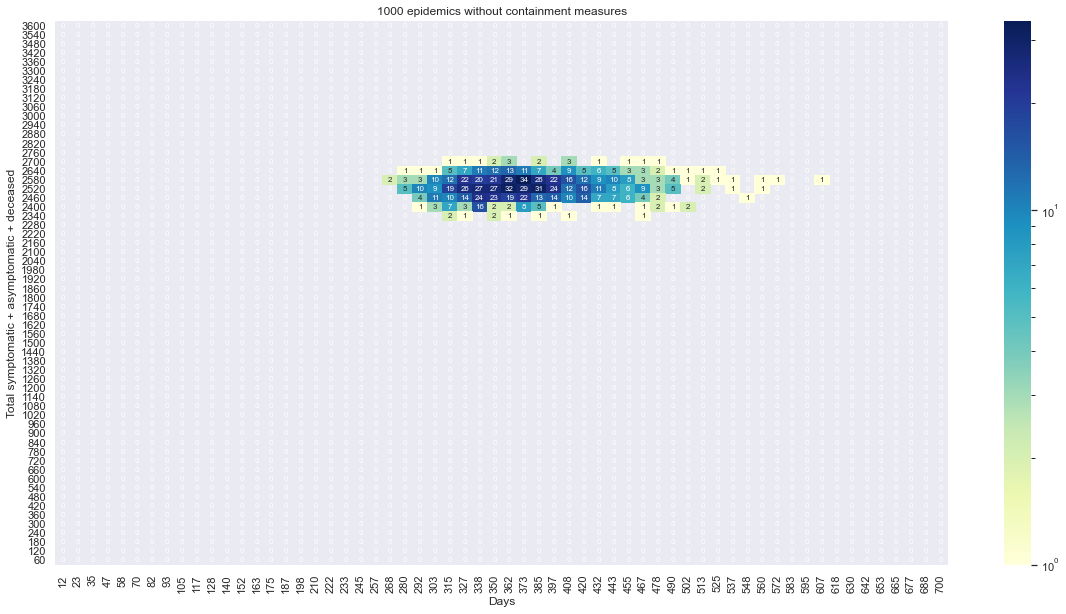

In [31]:
timeFunction(149,1000,'1000 epidemics without containment measures')